In [51]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

In [2]:
# Convert data to dataframes
lung_df1 = pd.read_csv(os.path.join("Resources", "CDC_Cancer1.csv"))
lung_df2 = pd.read_csv(os.path.join("Resources", "CDC_Cancer2.csv"))

# Combine dataframes into single dataframe
lung_df = lung_df1.append(lung_df2, ignore_index=True)

# Delete unnecessary columns
lung_df = lung_df.drop(["Notes", "State Code", "Year Code", "Sex Code", "Race Code", "Age Group Code"], axis=1)

In [3]:
# Check to see if there are any null values in dataframe
lung_df.isnull().sum()

State         102
Year          102
Sex           102
Race          102
Age Group     102
Deaths        102
Population    102
Crude Rate    102
dtype: int64

In [4]:
# Drop rows that have nothing but null values
lung_df = lung_df.dropna(how="all")
# Verify there are no null values left
lung_df.isnull().sum()

State         0
Year          0
Sex           0
Race          0
Age Group     0
Deaths        0
Population    0
Crude Rate    0
dtype: int64

In [5]:
# Cast "Year", "Deaths", and "Population" columns as integers
lung_df["Year"] = lung_df["Year"].astype(int)
lung_df["Deaths"] = lung_df["Deaths"].astype(int)
lung_df["Population"] = lung_df["Population"].astype(int)
lung_df.head()

,State,Year,Sex,Race,Age Group,Deaths,Population,Crude Rate
0,Alabama,2006,Female,American Indian or Alaska Native,< 1 year,0,131,0.0
1,Alabama,2006,Female,American Indian or Alaska Native,1-4 years,0,788,0.0
2,Alabama,2006,Female,American Indian or Alaska Native,5-9 years,0,1093,0.0
3,Alabama,2006,Female,American Indian or Alaska Native,10-14 years,0,1237,0.0
4,Alabama,2006,Female,American Indian or Alaska Native,15-19 years,0,1305,0.0


In [6]:
# Create dataframe of lung cancer deaths by year and race
lung_race_df = lung_df.groupby(["Year", "Race"])["Deaths"].sum().unstack()
# Create dataframe of population by year and race
pop_race_df = lung_df.groupby(["Year", "Race"])["Population"].sum().unstack()
lung_race_df.head()

Race,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,White
Year,,,,
2006,0,1579,14269,137040
2007,32,1544,14415,136871
2008,40,1669,14061,136894
2009,32,1698,13975,136293
2010,73,1664,14396,135790


In [7]:
#Set values for each section of the pie chart
lung_race_perc = lung_race_df.loc[2015]/lung_race_df.loc[2015].sum()
pop_race_perc = pop_race_df.loc[2015].tolist()/pop_race_df.loc[2015].sum()

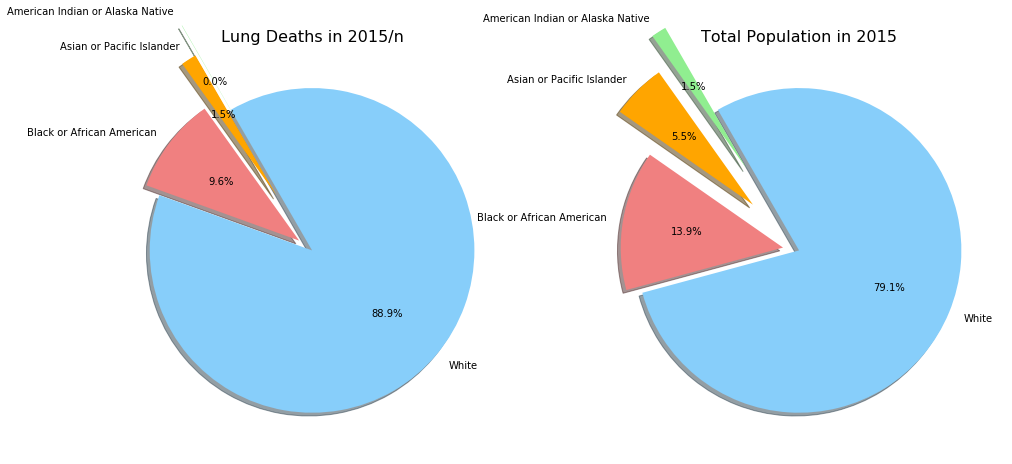

In [9]:
explode = [0.6, 0.4, 0.1, 0]
races = list(lung_race_df)
colors = ["lightgreen", "orange", "lightcoral", "lightskyblue"]

fig, [ax1,ax2] = plt.subplots(1, 2, figsize = (16, 8))
ax1.set_title("Lung Deaths in 2015", fontsize = 16)
ax2.set_title("Total Population in 2015", fontsize = 16)
ax1.pie(lung_race_perc, labels = races, colors = colors, explode = explode, autopct="%1.1f%%",shadow=True, 
        startangle = 120)
ax2.pie(pop_race_perc, labels = races, colors = colors, explode = explode, autopct="%1.1f%%",shadow=True, 
        startangle = 120)
plt.savefig(os.path.join("Output", "Pie_Chart_2015_Cancer.png"))
plt.show()

In [101]:
# Perform Chi-squared Goodness of Fit Test for Race

# Create dataframe of observed and expected values
deaths_2015 = lung_df[lung_df.Year==2015].groupby(["Year"])["Deaths"].sum()
expected_2015 = [x*deaths_2015[2015] for x in pop_race_perc]
observed_2015 = lung_race_df.loc[2015]
races_df = pd.DataFrame({"Observed": observed_2015, "Expected": expected_2015})

# Determine critical value for a p-value of .001 and 
critical_value = stats.chi2.ppf(q = 0.999, df = 3)
critical_value

16.26623619623813

In [98]:
# Run the chi square test with stats.chisquare()
stats.chisquare(races_df["Observed"], races_df["Expected"])

Power_divergenceResult(statistic=10042.5934526878, pvalue=0.0)

### Conclusion

* Since the chi square value of 10042.59 exceeds the critical value of 16.27, we conclude that the relationship between race and lung cancer mortality in 2015 is highly statistically significant.